In [8]:
import pandas as pd
import numpy as np

desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns', 20)

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

print(funcionarios_df)
print(clientes_df)
print(servicos_df)

     ID Funcionário Estado Civil           Nome Completo  Salario Base  Impostos  Beneficios   VT      VR       Cargo            Area
0                 1            C        Gabriel Mesquita         21910   10955.0      4382.0  242  719.04     Diretor       Operações
1                 2            C             João Haddad          5404    2702.0      1080.8  154  574.56  Estagiário       Logística
2                 3            C  Amanda Marques Ribeiro         16066    8033.0      3213.2  154  729.12  Estagiário  Administrativo
3                 4            C         Guilherme Nunez         21305   10652.5      4261.0  220  524.16    Analista  Administrativo
4                 5            C           Adelino Gomes          5098    2549.0      1019.6  176  725.76    Analista  Administrativo
..              ...          ...                     ...           ...       ...         ...  ...     ...         ...             ...
109             143            C   Renan Scharnhorst Ott      

In [9]:
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)
funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
print('O total da folha salarial é de: {:,}\n'.format(funcionarios_df['Salario Total'].sum()))

O total da folha salarial é de: 2,717,493.22



In [10]:
faturamentos_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']],on='ID Cliente')
faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']
print('O faturamento da empresa foi de: {:,}\n'.format(faturamentos_df['Faturamento Total'].sum()))

O faturamento da empresa foi de: 5,519,160



In [11]:
qtda_func_fecharam = len(servicos_df['ID Funcionário'].unique())
qtda_func_total = len(funcionarios_df['ID Funcionário'])
print('Percentual de funcionários que fecharam contrato {:.1%}\n'.format(qtda_func_fecharam / qtda_func_total))

Percentual de funcionários que fecharam contrato 86.8%



Gráfico de contratos por área: 


<AxesSubplot:>

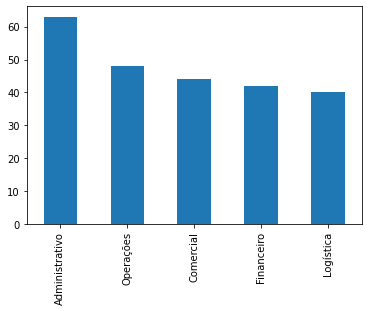

In [12]:
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
print('Gráfico de contratos por área: ')
contratos_area_df['Area'].value_counts().plot(kind='bar')

Gráfico de funcionários por área: 


<AxesSubplot:>

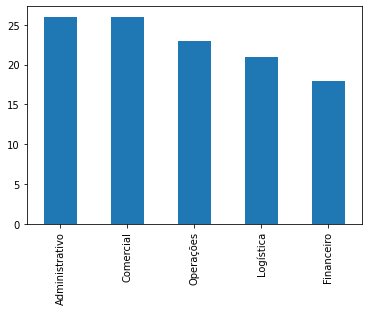

In [13]:
funcionarios_area = funcionarios_df[['ID Funcionário', 'Area']]
print('Gráfico de funcionários por área: ')
funcionarios_area['Area'].value_counts().plot(kind='bar')

In [14]:
print('O Ticket médio da empresa é : R${:,.2f}'.format(clientes_df['Valor Contrato Mensal'].mean()))

O Ticket médio da empresa é : R$2,502.56
